# Sprungantwort

Gegeben ist das System 1. Ordnung

$$H(s) = \frac{7}{1 + s \cdot 1 \text{ ms}}$$

Dieses System soll nun mit Hilfe der Sprungantwort $a(t)$ weiter analysiert werden. Implementieren Sie dazu folgende Schritte:

1. Erstellen Sie ein tf-Objekt des Systems und legen Sie dies in der Variable H ab.
2. Stellen Sie die Sprungantwort in einem Matlab-Plot dar (in `figure(1)`).
3. Bestimmen Sie den Wert der Sprungantwort $a(t = 1 \text{ ms})$ (d.h. nach Verstreichen der Zeitkonstanten) und legen Sie diesen in der Variable a_T ab.

Optionale Erweiterungen der Aufgabe:

1. Erweitern Sie beide Plots um eine Ursprungsgerade mit Steigung $\left.\frac{d}{dt}a(t)\right|_{t=0}$. Welchen Wert hat diese Gerade bei $t = 1 \text{ ms}$?

2. Verifizieren Sie wichtige Zwischenwerte eines Systems 1. Ordnung:

  $$\frac{a(t = 1 \text{ ms})}{a(t \to \infty)} = 63\% \quad \frac{a(t = 3 \cdot 1 \text{ ms})}{a(t \to \infty)} = 95\% \quad \frac{a(t = 5 \cdot 1 \text{ ms})}{a(t \to \infty)} = 99\%$$

Wert bei t=1ms: 63.25%
Wert bei t=3ms: 95.04%
Wert bei t=5ms: 99.32%


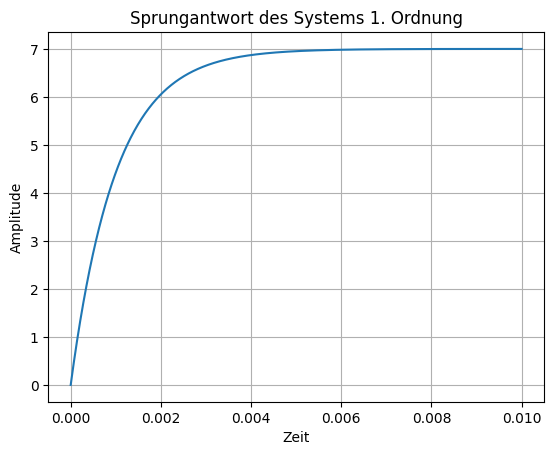

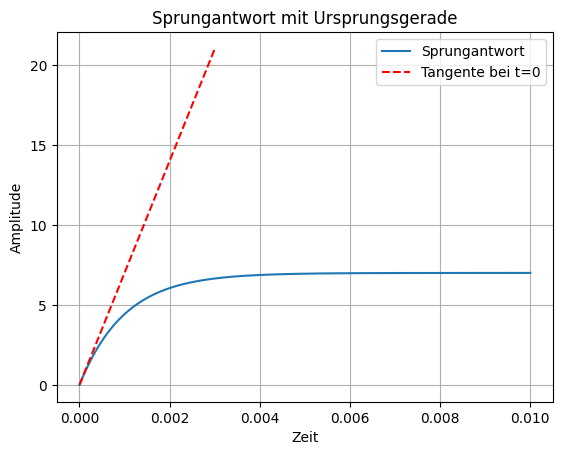

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import control as ctrl

# Übertragungsfunktion erstellen
s = ctrl.TransferFunction.s
H = 7 / (1 + s * 1e-3)

# Abbildung 1: Sprungantwort des Systems
plt.figure(1)
t = np.linspace(0, 1e-2, 1000)  # Zeitvektor erstellen
t, y = ctrl.step_response(H, T=t)
plt.plot(t, y)
plt.title('Sprungantwort des Systems 1. Ordnung')
plt.xlabel('Zeit')
plt.ylabel('Amplitude')
plt.grid(True)

# Wert zum Zeitpunkt 0,001 Sekunden finden
index = np.argmin(np.abs(t - 0.001))
a_T = y[index]

# Stationäre Verstärkung und Zeitkonstante berechnen
stationaereVerstaerkung = ctrl.dcgain(H)
zeitkonstante = 0.001

# Steigung am Ursprung berechnen
steigung = stationaereVerstaerkung / zeitkonstante

# Abbildung 2: Sprungantwort mit Tangente am Ursprung
plt.figure(2)
t, y = ctrl.step_response(H, T=t)
plt.plot(t, y, label='Sprungantwort')

# Tangente am Ursprung zeichnen
zeitLinie = np.array([0, 0.003])
wertLinie = np.array([0, steigung * 0.003])
plt.plot(zeitLinie, wertLinie, 'r--', linewidth=1.5, label='Tangente bei t=0')

plt.title('Sprungantwort mit Ursprungsgerade')
plt.xlabel('Zeit')
plt.ylabel('Amplitude')
plt.grid(True)
plt.legend()

# Prozentwerte zu bestimmten Zeitpunkten berechnen
index1ms = np.argmin(np.abs(t - 1e-3))
index3ms = np.argmin(np.abs(t - 3e-3))
index5ms = np.argmin(np.abs(t - 5e-3))

prozent1ms = y[index1ms] / stationaereVerstaerkung * 100
prozent3ms = y[index3ms] / stationaereVerstaerkung * 100
prozent5ms = y[index5ms] / stationaereVerstaerkung * 100

# Ergebnisse ausgeben
print(f"Wert bei t=1ms: {prozent1ms:.2f}%")
print(f"Wert bei t=3ms: {prozent3ms:.2f}%")
print(f"Wert bei t=5ms: {prozent5ms:.2f}%")

plt.show()